In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from zipfile import ZipFile
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
# from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Mark train
with ZipFile('/content/drive/MyDrive/train_pizza.zip') as zipObj:
  zipObj.extractall('/sample/train_pizza/')

In [4]:
with ZipFile('/content/drive/MyDrive/test_pizza.zip') as zipObj1:
  zipObj1.extractall('/test_pizza')

In [5]:
## Mark train
training_dataset_path = "/sample/train_pizza/train"
test_dataset_path = "/test_pizza/test_pizza"

In [6]:
EPOCHS = 30
BATCH_SIZE = 32
image_height = 227
image_width = 227
train_dir = "/sample/train_pizza/train"
valid_dir = "/test_pizza"
# model_dir = "./my_model.h5"

In [7]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 930 images belonging to 2 classes.
Found 371 images belonging to 1 classes.


VGG 16

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import load_model
model = load_model('/content/drive/MyDrive/alex_rip_off_pizza_included_final.h5')





In [10]:
for layer in model.layers:
  layer.trainable=False

In [15]:
x = Flatten()(model.output)
prediction = Dense(2, activation='softmax')(x)
model3 = Model(inputs=model.input, outputs=prediction)
model3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       8851

In [16]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])

m=model3.fit_generator(train_generator,validation_data  = valid_generator,epochs=10,verbose=2)

<ipython-input-16-24c7b534a67d>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m=model3.fit_generator(train_generator,validation_data  = valid_generator,epochs=10,verbose=2)


Epoch 1/10
30/30 - 68s - loss: 0.6323 - accuracy: 0.6989 - val_loss: 1.7636 - val_accuracy: 0.9353 - 68s/epoch - 2s/step
Epoch 2/10
30/30 - 66s - loss: 0.6304 - accuracy: 0.6978 - val_loss: 1.7632 - val_accuracy: 0.9353 - 66s/epoch - 2s/step
Epoch 3/10
30/30 - 66s - loss: 0.6298 - accuracy: 0.6978 - val_loss: 1.7628 - val_accuracy: 0.9353 - 66s/epoch - 2s/step
Epoch 4/10
30/30 - 65s - loss: 0.6287 - accuracy: 0.6978 - val_loss: 1.7623 - val_accuracy: 0.9353 - 65s/epoch - 2s/step
Epoch 5/10
30/30 - 66s - loss: 0.6300 - accuracy: 0.7000 - val_loss: 1.7620 - val_accuracy: 0.9353 - 66s/epoch - 2s/step
Epoch 6/10
30/30 - 68s - loss: 0.6252 - accuracy: 0.6989 - val_loss: 1.7616 - val_accuracy: 0.9353 - 68s/epoch - 2s/step
Epoch 7/10
30/30 - 66s - loss: 0.6326 - accuracy: 0.6957 - val_loss: 1.7612 - val_accuracy: 0.9353 - 66s/epoch - 2s/step
Epoch 8/10
30/30 - 65s - loss: 0.6278 - accuracy: 0.6989 - val_loss: 1.7607 - val_accuracy: 0.9353 - 65s/epoch - 2s/step
Epoch 9/10
30/30 - 68s - loss: 0

In [17]:
def plot_accuracy(hist):
        
  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("Model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

In [18]:
def plot_loss(hist):
  plt.plot(hist.history["loss"])
  plt.plot(hist.history["val_loss"])
  plt.title("Model loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

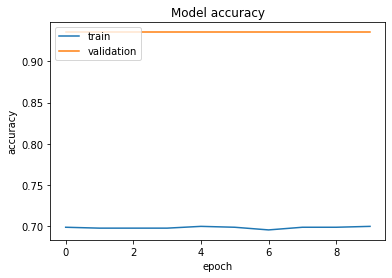

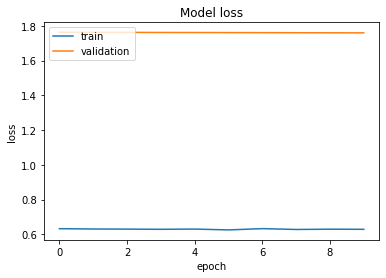

In [19]:
plot_accuracy(m)
plot_loss(m)